Based on [Data Science for Beginners](https://microsoft.github.io/Data-Science-For-Beginners/#/) by Microsoft.

In [1]:
import re
import numpy as np
from googlesearch import search
import requests
from bs4 import BeautifulSoup
import nlp_rake
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from typing import List

In [53]:
# nltk.download('stopwords')

In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
def search_google(phrase: str, num_results:int) -> List[str]:
    """
    Extracts num_results urls from google search engine for phrase.
    """
    urls = []
    for url in search(phrase, num_results=num_results, sleep_interval=1):
        urls.append(url)
    urls = [url for url in urls if re.match(r'.+\.com\/.+|.+\.edu\/|.+\.org\/', url)]
    return urls

In [5]:
def extract_text(urls: List[str]) -> str:
    """
    Extracts text from urls (doesn't crawl).
    """
    all_text = ''
    for url in urls:
        res = requests.get(url)
        soup = BeautifulSoup(res.text, 'html.parser')
        headings = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
        paragraphs = soup.find_all('p')
        headings_text = [heading.text for heading in headings]
        paragraphs_text = [paragraph.text for paragraph in paragraphs]
        home_text = headings_text + paragraphs_text
        home_text = ' '.join(home_text) + ' '
        all_text += home_text
    all_text = re.sub(r'\[.+\]', '', all_text)
    return all_text

In [6]:
text = extract_text(search_google('cognitive science', 25))

In [7]:
keyword_extractor = nlp_rake.Rake(stopwords=stopwords.words('english'))
res = keyword_extractor.apply(text)

In [8]:
# Make sure data are sorted
res = sorted(res, key=lambda x: x[1], reverse=True)

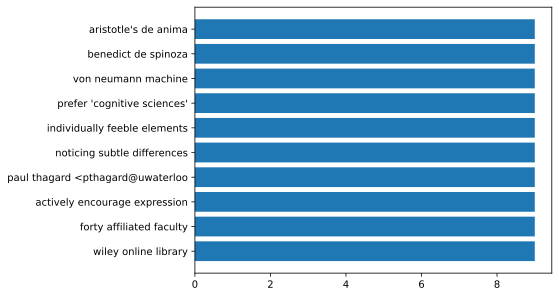

In [11]:
top25 = res[:10][::-1]

def plot_keywords(keywords:List[tuple]):
    k, v = zip(*top25)
    plt.barh(range(len(k)), v)
    plt.yticks(range(len(k)), k)

plot_keywords(top25)

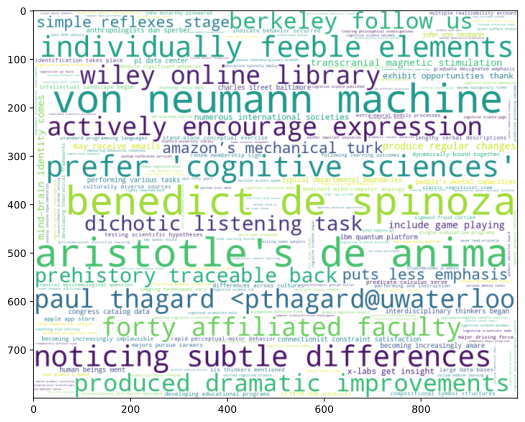

In [12]:
wc = WordCloud(background_color='white', width=1000, height=800)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k:v for k, v in res}))

Interestingly Aristotle's de anima, von Neumann machine and Spinoza seem to be keywords best defining cognitive science. Perhaps it even makes sense -- cognitive scientist strives to explain the mind or the soul (Aristote's de anima) through computational structure (von Neumann machine).